In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('../../data/mission_2/DJI_0247.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

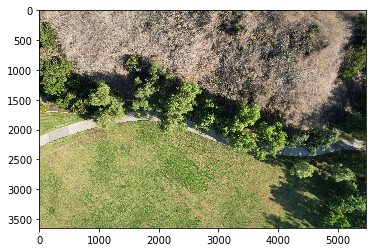

In [3]:
plt.imshow(image)

In [6]:
sam_checkpoint = "./sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda:3"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [26]:
# resize image with ratio
ratio = 0.5
image = cv2.resize(image, (int(image.shape[1] * ratio), int(image.shape[0] * ratio)))
print(image.shape)

(912, 1368, 3)


In [27]:
masks = mask_generator.generate(image)


In [28]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [29]:
print(len(masks))
print(masks[0].keys())

72
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


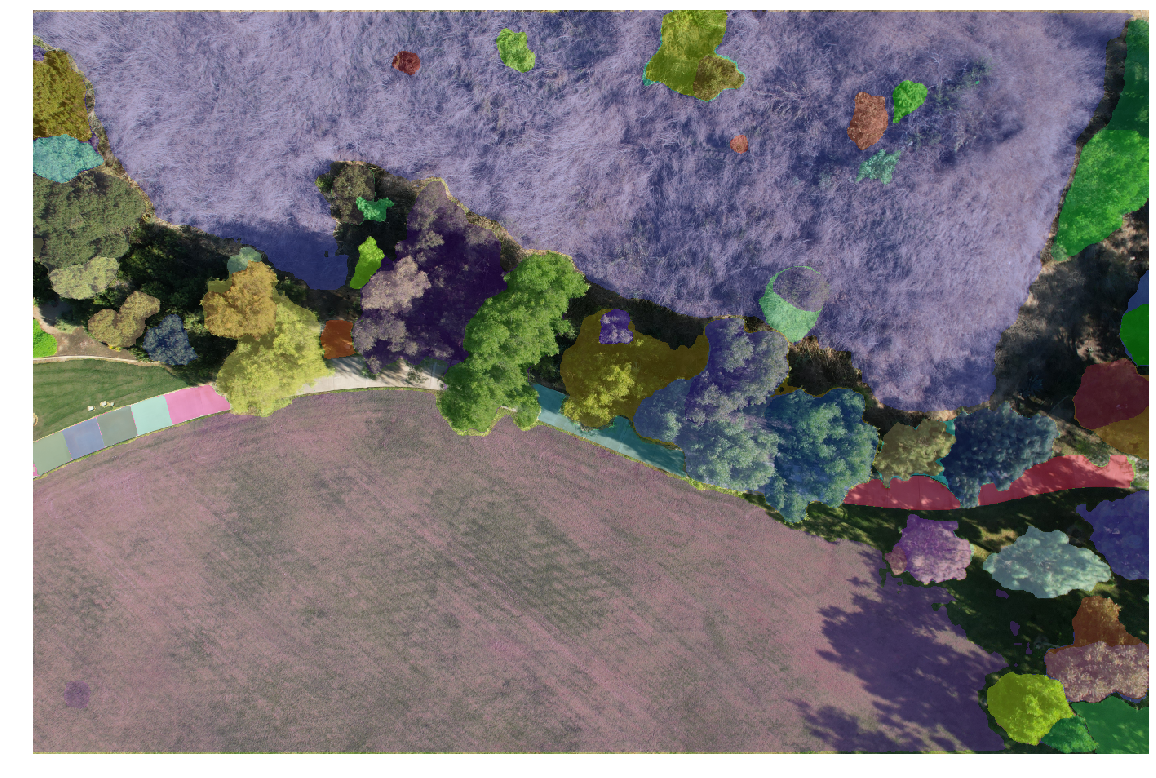

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [36]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=64,
    pred_iou_thresh=0.96,
    stability_score_thresh=0.92,
    #crop_n_layers=1,
    #crop_n_points_downscale_factor=2,
    #min_mask_region_area=10,  # Requires open-cv to run post-processing
    #output_mode='uncompressed_rle',
)

In [37]:
masks2 = mask_generator_2.generate(image)

In [38]:
len(masks2)

35

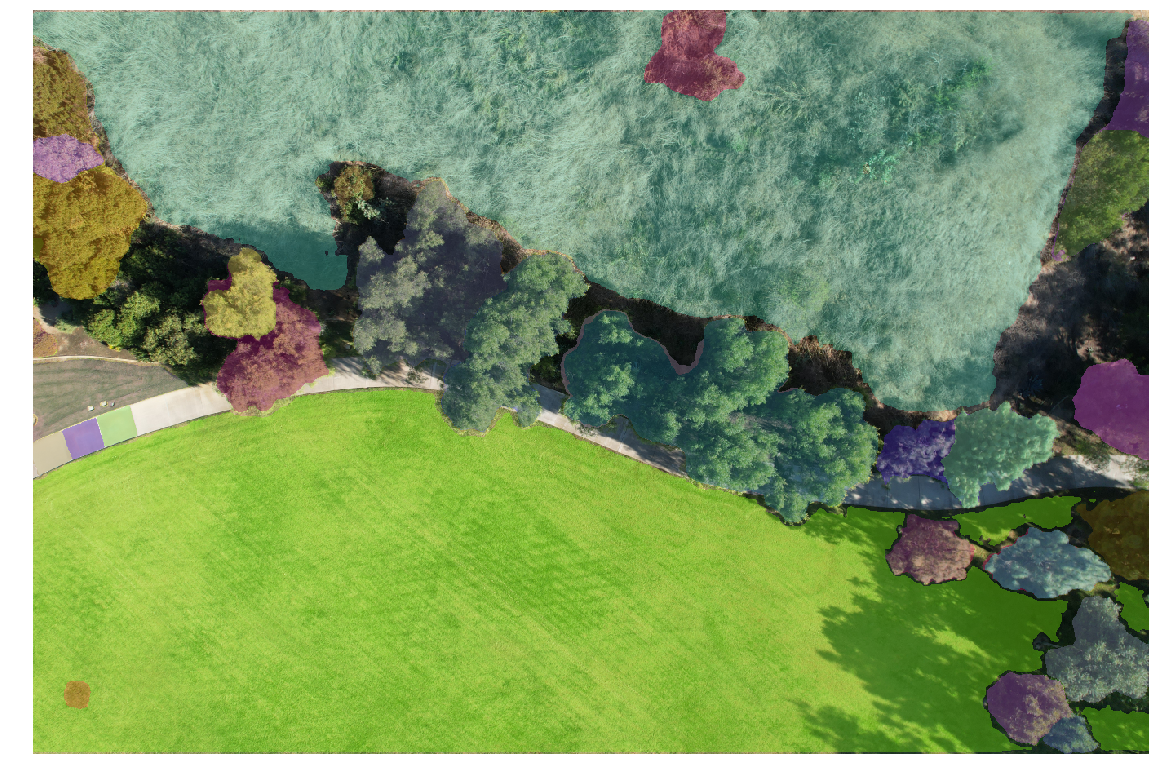

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 

In [39]:
print(masks2)

[{'segmentation': {'size': [912, 1368], 'counts': [4, 27, 885, 27, 885, 27, 884, 28, 884, 29, 883, 30, 882, 30, 882, 31, 881, 31, 881, 32, 880, 33, 879, 35, 877, 36, 876, 37, 875, 37, 875, 38, 874, 38, 874, 39, 872, 40, 872, 41, 872, 40, 872, 41, 871, 41, 871, 42, 870, 43, 869, 43, 868, 44, 868, 44, 868, 44, 868, 44, 868, 45, 867, 45, 867, 45, 867, 46, 866, 46, 866, 47, 865, 47, 865, 47, 865, 47, 865, 48, 864, 48, 864, 49, 863, 50, 862, 51, 862, 51, 861, 52, 860, 53, 859, 54, 858, 56, 856, 57, 854, 60, 852, 62, 850, 64, 848, 65, 847, 68, 844, 70, 842, 71, 842, 71, 841, 72, 840, 72, 840, 73, 839, 73, 839, 75, 837, 77, 835, 79, 833, 80, 832, 81, 831, 83, 829, 84, 828, 84, 828, 85, 827, 87, 825, 88, 824, 91, 821, 95, 817, 101, 14, 6, 791, 126, 786, 128, 784, 130, 782, 131, 781, 132, 780, 133, 779, 134, 778, 135, 777, 137, 775, 139, 773, 141, 771, 143, 769, 145, 767, 147, 765, 150, 762, 153, 759, 156, 756, 160, 752, 163, 749, 167, 745, 171, 741, 173, 739, 175, 737, 176, 736, 177, 735, 178,